In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn import tree
from sklearn.tree import export_graphviz
import altair as alt
from dtreeviz.trees import dtreeviz # will be used for tree visualization
from matplotlib import pyplot as plt
from sklearn.cross_decomposition import PLSRegression
from sklearn.ensemble import GradientBoostingRegressor
alt.data_transformers.disable_max_rows()

DataTransformerRegistry.enable('default')

## File Import

In [2]:
df = pd.read_csv("../data_input/prod_v1.csv", index_col = None)
df = df.drop(columns = 'Unnamed: 0')
df

,Ts,t,HF,Weight,Tr,sheet_name,compound,condition,exp_no
0,37.9761,0,0.688240,100.0000,25.0000,I1-30-1,I1,30,1
1,37.9745,1,0.669934,99.9798,25.1667,I1-30-1,I1,30,1
2,37.9844,2,0.657603,99.9667,25.3333,I1-30-1,I1,30,1
3,38.0142,3,0.645318,99.9584,25.5000,I1-30-1,I1,30,1
4,38.0930,4,0.653498,99.9616,25.6667,I1-30-1,I1,30,1
...,...,...,...,...,...,...,...,...,...
144176,505.7480,4646,222.131000,51.6847,500.0000,DAO-60-3,DAO,60,3
144177,505.7490,4647,222.124000,51.6847,500.0000,DAO-60-3,DAO,60,3
144178,505.7480,4648,222.116000,51.6847,500.0000,DAO-60-3,DAO,60,3
144179,505.7430,4649,222.110000,51.6847,500.0000,DAO-60-3,DAO,60,3


In [3]:
df.groupby(['compound', 'condition', 'exp_no']).agg('count').reset_index()

,compound,condition,exp_no,Ts,t,HF,Weight,Tr,sheet_name
0,DAO,30,1,4651,4651,4651,4651,4651,4651
1,DAO,30,2,4651,4651,4651,4651,4651,4651
2,DAO,30,3,4651,4651,4651,4651,4651,4651
3,DAO,45,1,4651,4651,4651,4651,4651,4651
4,DAO,45,2,4651,4651,4651,4651,4651,4651
5,DAO,45,3,4651,4651,4651,4651,4651,4651
6,DAO,60,1,4651,4651,4651,4651,4651,4651
7,DAO,60,2,4651,4651,4651,4651,4651,4651
8,DAO,60,3,4651,4651,4651,4651,4651,4651
9,I05,30,1,4651,4651,4651,4651,4651,4651


In [4]:
df.compound.value_counts()

I05    55812
I1     46510
DAO    41859
Name: compound, dtype: int64

In [5]:
def test_train_compound(df, product):
    """
    Function to split test/train data for each compound
    
    Argument:
        df      : pandas dataframe
        product : tbbpa, caoh2, both
        
    Output:
        X_train, X_test, y_train, y_test : 4 pandas dataframe which have the split data 
    """
    df = df.query('compound == @product')
    
    X_train = df.query('exp_no != 3')[["Ts", 't', 'HF', 'Tr', 'condition']]
    y_train = df.query('exp_no != 3')["Weight"]
    
    X_test = df.query('exp_no == 3')[["Ts", 't', 'HF', 'Tr', 'condition']]
    y_test = df.query('exp_no == 3')["Weight"]
    
    return X_train, X_test, y_train, y_test

In [6]:
df_results = pd.DataFrame({'Model': [],
                           'Compound' : [],
                           'Train Accuracy': [],
                           'Test Accuracy' : []
                           })
df_results

,Model,Compound,Train Accuracy,Test Accuracy


## Summary

In [20]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,I05,0.974158,0.973586
NaN,Linear Regression,I1,0.910002,0.952303
NaN,Linear Regression,DAO,0.910116,0.934134
NaN,Partial Least Squares (n=2),I05,0.929933,0.930002
NaN,Partial Least Squares (n=2),I1,0.818482,0.791990
NaN,Partial Least Squares (n=2),DAO,0.860540,0.893599
NaN,Partial Least Squares (n=3),I05,0.937406,0.941198
NaN,Partial Least Squares (n=3),I1,0.876784,0.914750
NaN,Partial Least Squares (n=3),DAO,0.868185,0.896427
NaN,Random Forest Regression (max_depth = 2),I05,0.981835,0.985314


## Linear Modelling

In [8]:
def linear_model(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    lr = LinearRegression().fit(X_train, y_train.ravel())
    
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = lr.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_lr_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", lr.score(X_train, y_train))
    print("The testing accuracy for the model is ", lr.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Linear Regression',
                           'Train Accuracy': lr.score(X_train, y_train),
                           'Test Accuracy' : lr.score(X_test, y_test),
                           'Compound' : product}, index = [None])
    
for i in df.compound.value_counts().index:
    df_results = df_results.append(linear_model(df, i))
    

The 4 matrices for -- I05 -- are of sizes:  (37208, 5) (18604, 5) (37208,) (18604,)
The training accuracy for the model is  0.9741576039681755
The testing accuracy for the model is  0.9735857413586257
The 4 matrices for -- I1 -- are of sizes:  (32557, 5) (13953, 5) (32557,) (13953,)
The training accuracy for the model is  0.9100016066349721
The testing accuracy for the model is  0.9523030693288699
The 4 matrices for -- DAO -- are of sizes:  (27906, 5) (13953, 5) (27906,) (13953,)
The training accuracy for the model is  0.9101157954991386
The testing accuracy for the model is  0.9341341316258166


## PLSR

In [9]:
def pls2(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls2 = PLSRegression(n_components=2).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = pls2.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_plsr2_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", pls2.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls2.score(X_test, y_test))
    return pd.DataFrame({'Model': 'Partial Least Squares (n=2)',
                           'Train Accuracy': pls2.score(X_train, y_train),
                           'Test Accuracy' : pls2.score(X_test, y_test),
                           'Compound' : i}, index = [None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(pls2(df, i))

The 4 matrices for -- I05 -- are of sizes:  (37208, 5) (18604, 5) (37208,) (18604,)
The training accuracy for the model is  0.9299333139722193
The testing accuracy for the model is  0.9300017903597618
The 4 matrices for -- I1 -- are of sizes:  (32557, 5) (13953, 5) (32557,) (13953,)
The training accuracy for the model is  0.8184819224967155
The testing accuracy for the model is  0.7919899916391515
The 4 matrices for -- DAO -- are of sizes:  (27906, 5) (13953, 5) (27906,) (13953,)
The training accuracy for the model is  0.8605398947027638
The testing accuracy for the model is  0.8935990292921117


In [10]:
df_results

,Model,Compound,Train Accuracy,Test Accuracy
NaN,Linear Regression,I05,0.974158,0.973586
NaN,Linear Regression,I1,0.910002,0.952303
NaN,Linear Regression,DAO,0.910116,0.934134
NaN,Partial Least Squares (n=2),I05,0.929933,0.930002
NaN,Partial Least Squares (n=2),I1,0.818482,0.791990
NaN,Partial Least Squares (n=2),DAO,0.860540,0.893599


In [11]:
def pls3(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    pls3 = PLSRegression(n_components=3).fit(X_train, y_train)
    print("The training accuracy for the model is ", pls3.score(X_train, y_train))
    print("The testing accuracy for the model is ", pls3.score(X_test, y_test))
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = pls3.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_plsr3_{}.csv'.format(product))
    
    return pd.DataFrame({'Model': 'Partial Least Squares (n=3)',
                           'Train Accuracy': pls3.score(X_train, y_train),
                           'Test Accuracy' : pls3.score(X_test, y_test),
                           'Compound' : i}, index = [None])
for i in df.compound.value_counts().index:
    df_results = df_results.append(pls3(df, i))

The 4 matrices for -- I05 -- are of sizes:  (37208, 5) (18604, 5) (37208,) (18604,)
The training accuracy for the model is  0.9374063853575725
The testing accuracy for the model is  0.9411981773894424
The 4 matrices for -- I1 -- are of sizes:  (32557, 5) (13953, 5) (32557,) (13953,)
The training accuracy for the model is  0.8767838872567203
The testing accuracy for the model is  0.9147498297221092
The 4 matrices for -- DAO -- are of sizes:  (27906, 5) (13953, 5) (27906,) (13953,)
The training accuracy for the model is  0.8681848676530629
The testing accuracy for the model is  0.8964274502058958


## Random forest

In [12]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf2 = RandomForestRegressor(random_state=0, max_depth = 2).fit(X_train, y_train)
    
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf2.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_rf2_{}.csv'.format(product))
    
    
    print("The training accuracy for the model is ", rf2.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf2.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 2)',
                           'Train Accuracy': rf2.score(X_train, y_train),
                           'Test Accuracy' : rf2.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- I05 -- are of sizes:  (37208, 5) (18604, 5) (37208,) (18604,)
The training accuracy for the model is  0.9818351904441154
The testing accuracy for the model is  0.9853138529810065
The 4 matrices for -- I1 -- are of sizes:  (32557, 5) (13953, 5) (32557,) (13953,)
The training accuracy for the model is  0.9532947387481757
The testing accuracy for the model is  0.8961515344874892
The 4 matrices for -- DAO -- are of sizes:  (27906, 5) (13953, 5) (27906,) (13953,)
The training accuracy for the model is  0.9370476931494357
The testing accuracy for the model is  0.9460517041229975


In [13]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf5 = RandomForestRegressor(random_state=0, max_depth = 5).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf5.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_rf5_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf5.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf5.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 5)',
                           'Train Accuracy': rf5.score(X_train, y_train),
                           'Test Accuracy' : rf5.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- I05 -- are of sizes:  (37208, 5) (18604, 5) (37208,) (18604,)
The training accuracy for the model is  0.9952062003157319
The testing accuracy for the model is  0.9937473840401545
The 4 matrices for -- I1 -- are of sizes:  (32557, 5) (13953, 5) (32557,) (13953,)
The training accuracy for the model is  0.9945038659112673
The testing accuracy for the model is  0.9398424510818814
The 4 matrices for -- DAO -- are of sizes:  (27906, 5) (13953, 5) (27906,) (13953,)
The training accuracy for the model is  0.983104322656136
The testing accuracy for the model is  0.9650438979838677


In [14]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf7 = RandomForestRegressor(random_state=0, max_depth = 7).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf7.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_rf7_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf7.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf7.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 7)',
                           'Train Accuracy': rf7.score(X_train, y_train),
                           'Test Accuracy' : rf7.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- I05 -- are of sizes:  (37208, 5) (18604, 5) (37208,) (18604,)
The training accuracy for the model is  0.996980330661549
The testing accuracy for the model is  0.9929355007285346
The 4 matrices for -- I1 -- are of sizes:  (32557, 5) (13953, 5) (32557,) (13953,)
The training accuracy for the model is  0.9984440027102001
The testing accuracy for the model is  0.9338508977177312
The 4 matrices for -- DAO -- are of sizes:  (27906, 5) (13953, 5) (27906,) (13953,)
The training accuracy for the model is  0.9912344718842588
The testing accuracy for the model is  0.9742645965348885


In [15]:
def random_forest(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    rf10 = RandomForestRegressor(random_state=0, max_depth = 10).fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = rf10.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_rf10_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", rf10.score(X_train, y_train))
    print("The testing accuracy for the model is ", rf10.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Random Forest Regression (max_depth = 10)',
                           'Train Accuracy': rf10.score(X_train, y_train),
                           'Test Accuracy' : rf10.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(random_forest(df, i))

The 4 matrices for -- I05 -- are of sizes:  (37208, 5) (18604, 5) (37208,) (18604,)
The training accuracy for the model is  0.9992233888918308
The testing accuracy for the model is  0.9903332875932348
The 4 matrices for -- I1 -- are of sizes:  (32557, 5) (13953, 5) (32557,) (13953,)
The training accuracy for the model is  0.9995373468402905
The testing accuracy for the model is  0.940412194560271
The 4 matrices for -- DAO -- are of sizes:  (27906, 5) (13953, 5) (27906,) (13953,)
The training accuracy for the model is  0.9966695588215492
The testing accuracy for the model is  0.9749739406408203


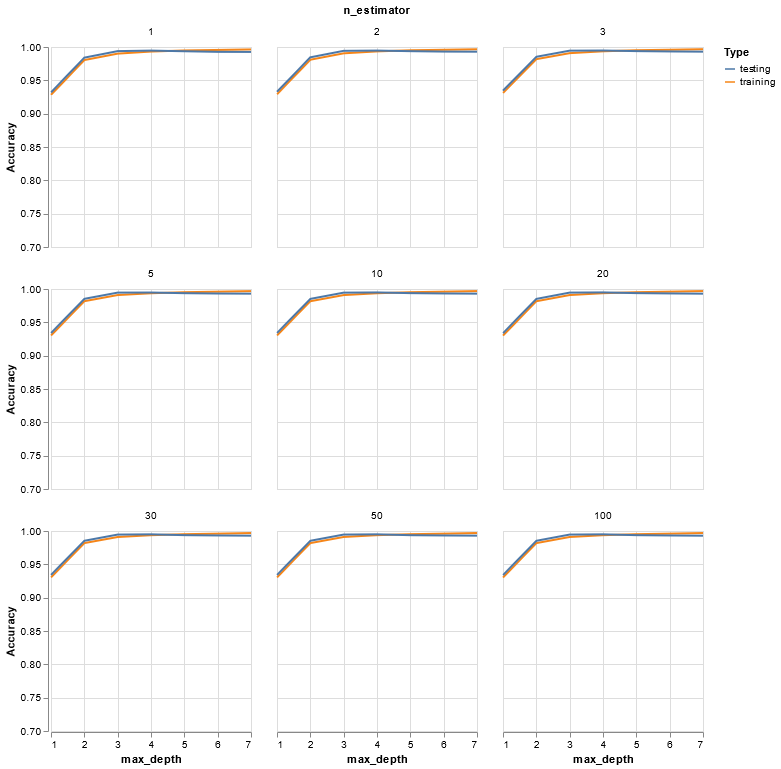

In [16]:
n_est = [1,2,3,5,10,20,30,50,100]
max_depth = range(1,8)
X_train, X_test, y_train, y_test = test_train_compound(df, "I05")
trees = []
train_acc = []
test_acc = []
depth = []
for j in max_depth:
    for i in n_est:
        trees.append(i)
        depth.append(j)
        rf = RandomForestRegressor(n_estimators = i, max_depth = j, random_state=0).fit(X_train, y_train)
        train_acc.append(rf.score(X_train, y_train))
        test_acc.append(rf.score(X_test, y_test))
        #print(j,i)
df_rf = pd.DataFrame({'training' : train_acc,
                      'testing' : test_acc,
                      'n_estimator' : trees,
                      'max_depth' : depth})
df_rf = df_rf.melt(id_vars = ['n_estimator', 'max_depth'], var_name = 'Type', value_name = 'Accuracy')
df_rf
alt.Chart(df_rf).mark_line().encode(
    alt.X('max_depth'),
    alt.Y('Accuracy', scale=alt.Scale(domain=[0.7, 1])),
    alt.Color('Type'),
    alt.Facet('n_estimator')
    ).properties(width = 200, height = 200, columns = 3)

## SVR

In [17]:
def svr_rbf(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    svr_rbf = SVR(kernel="rbf").fit(X_train, y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = svr_rbf.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_svr_rbf_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", svr_rbf.score(X_train, y_train))
    print("The testing accuracy for the model is ", svr_rbf.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'SVR RBF Kernel',
                           'Train Accuracy': svr_rbf.score(X_train, y_train),
                           'Test Accuracy' : svr_rbf.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(svr_rbf(df, i))

The 4 matrices for -- I05 -- are of sizes:  (37208, 5) (18604, 5) (37208,) (18604,)
The training accuracy for the model is  0.9842168906032175
The testing accuracy for the model is  0.9873893712540971
The 4 matrices for -- I1 -- are of sizes:  (32557, 5) (13953, 5) (32557,) (13953,)
The training accuracy for the model is  0.8737161259329066
The testing accuracy for the model is  0.9673710363019372
The 4 matrices for -- DAO -- are of sizes:  (27906, 5) (13953, 5) (27906,) (13953,)
The training accuracy for the model is  0.8900064650186401
The testing accuracy for the model is  0.9345166622170472


## GBR

In [18]:
def gbr(df, product):
    X_train, X_test, y_train, y_test = test_train_compound(df, product)
    print("The 4 matrices for --", product, "-- are of sizes: ", X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    gbr = GradientBoostingRegressor().fit(X_train,y_train)
    
    df_pred = pd.concat([X_test, y_test], axis = 1)
    df_pred['predicted_wt'] = gbr.predict(X_test)
    df_pred.to_csv(r'../output/scenario5/prediction_gbr_{}.csv'.format(product))
    
    print("The training accuracy for the model is ", gbr.score(X_train, y_train))
    print("The testing accuracy for the model is ", gbr.score(X_test, y_test))
    
    return pd.DataFrame({'Model': 'Gradient Boost Regressor',
                           'Train Accuracy': gbr.score(X_train, y_train),
                           'Test Accuracy' : gbr.score(X_test, y_test),
                           'Compound' : i}, index=[None])

for i in df.compound.value_counts().index:
    df_results = df_results.append(gbr(df, i))

The 4 matrices for -- I05 -- are of sizes:  (37208, 5) (18604, 5) (37208,) (18604,)
The training accuracy for the model is  0.9975613943626449
The testing accuracy for the model is  0.9952612500901954
The 4 matrices for -- I1 -- are of sizes:  (32557, 5) (13953, 5) (32557,) (13953,)
The training accuracy for the model is  0.997980315001308
The testing accuracy for the model is  0.9514246914436165
The 4 matrices for -- DAO -- are of sizes:  (27906, 5) (13953, 5) (27906,) (13953,)
The training accuracy for the model is  0.9936850390135884
The testing accuracy for the model is  0.9727986259261473


In [19]:
df_results.to_csv('../output/scenario5/results_table.csv')